In [1]:
import pandas as pd

import numpy as np
from typing import Dict, List, Union, Optional

import os
from typing import List, Tuple, Union, Any
from collections import Counter
import random
import string
from rapidfuzz import process

import pyarrow as pa
import pyarrow.parquet as pq
import math
import copy

In [4]:
old_chrome_data = pd.read_parquet(f"../../data/interim/chrome/08_12_2022/http.0.parquet.gzip")

In [2]:
new_chrome_data = pd.read_parquet(f"ndarray_chrome_test.parquet")

In [5]:
other_columns = old_chrome_data.columns.values.tolist()
chrome_columns = new_chrome_data.columns.values.tolist()
cols_not_in_chrome = list(set(other_columns).difference(chrome_columns))

In [6]:
cols_not_in_chrome

['x-cms-cdninvalkey',
 'x-web-ver',
 'resin-trace',
 'trd-ts',
 'x-msedge-features',
 'x-temp-format',
 'x-site-developed-by',
 'ihg-apigee-srv',
 'x-redirects-version',
 'x-client-scheme',
 'x-debug-pass',
 'x-pbs-fwsrvname',
 'x-wix-ssr-cacheable',
 'x-hootsuite-ingress',
 'x-api-host',
 'image-proxy',
 'x-log-uid',
 'x-swiftype-backend-region',
 'x-is-shadow-site',
 'filter-class',
 'x-is-interanet',
 'x-imgnow-server',
 'x-debug-host',
 'x-tableau-cf-response-time',
 'ig-set-use-auth-header-for-sso',
 'x-bbc-origin-response-status',
 'x-skip-cache-cookie',
 'nginx-version',
 'x-chesscom-servedby',
 'x-env-psm',
 'vnd.eo.request-id',
 'express-uuid',
 'x-apz-server',
 'x-trp-pba',
 'x-cloudmap',
 'real-uri',
 'x-oss-restore-tier',
 'x-cms-developed-by',
 'x-debug-x-forwarded-host',
 'x-ldnr-root-hl-set',
 'se',
 'stored-vary-value',
 'x-apple-i-request-id',
 'cld_by',
 'x-crunchyroll-regenerated-from',
 'x-xy-cip',
 'x-oss-meta-sys-storage-class',
 'x-inap-server',
 'x-ak-origin',
 

In [103]:
new_chrome_data[new_chrome_data['hostname'].notnull() == True]['hostname']

3372                      p56793v.hulk.bjpdc
49357    web-proxy-prod-dpt-55654bbb69-npw77
49358            advert_iis_web133v25_qcloud
49359            advert_iis_web154v25_qcloud
49360            advert_iis_web23v220_qcloud
                        ...                 
61001            advert_iis_web22v220_qcloud
61002            advert_iis_web209v24_qcloud
61009            advert_iis_web22v220_qcloud
61012            advert_iis_web100v25_qcloud
61013            advert_iis_web140v25_qcloud
Name: hostname, Length: 77, dtype: object

In [124]:
new_chrome_data[new_chrome_data['x-postal-code'].notnull() == True]['x-postal-code']

12285    60323
Name: x-postal-code, dtype: object

In [125]:
new_chrome_data[new_chrome_data['sm-log-id'].notnull() == True]['sm-log-id']

77768    flb-cad7971630f7d7e82b725145220a4af6
77773    flb-4756c41efe723f99d61e3f3c86e5df0a
77774    flb-c3c0ed9ca5fe70c3f1cb47236755c7f4
77775    flb-36e11bd5fda783b7f1b265107abc087f
77783    flb-f76d740882cd24b989d988b8c719f1ac
                         ...                 
77921    flb-23c10b9488a4b87341a9555c09031386
77922    flb-74576765e07bb5cce0c98dd9f5099d3a
77965    flb-fadb6f95370ec06642efdcc08c9b34c4
77990    flb-a43d45ba757236d35363b0c5130c159b
77991    flb-fda4d0cebd334e54d0c75558f234c3c3
Name: sm-log-id, Length: 67, dtype: object

In [5]:
new_chrome_data[['pragma', 'content-length', 'content-type', 'date', 'tracker']]

,pragma,content-length,content-type,date,tracker
0,no-cache,None,text/javascript,"wed, 29 mar 2023 14:00:08 gmt",1
1,None,0,text/html,"wed, 29 mar 2023 14:00:09 gmt",1
2,no-cache,133,application/json; charset=utf-8,"wed, 29 mar 2023 14:00:09 gmt",1
3,None,29,text/javascript,"wed, 29 mar 2023 13:50:11 gmt",1
4,None,0,text/html,"wed, 29 mar 2023 14:00:09 gmt",0
...,...,...,...,...,...
802808,no-cache,43,image/gif,"thu, 30 mar 2023 00:42:10 gmt",1
802809,None,None,application/json; charset=utf-8,"thu, 30 mar 2023 00:28:57 gmt",0
802810,no-cache,43,image/gif,"thu, 30 mar 2023 00:42:13 gmt",1
802811,no-cache,43,image/gif,"thu, 30 mar 2023 00:42:15 gmt",1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='tracker', ylabel='Count'>

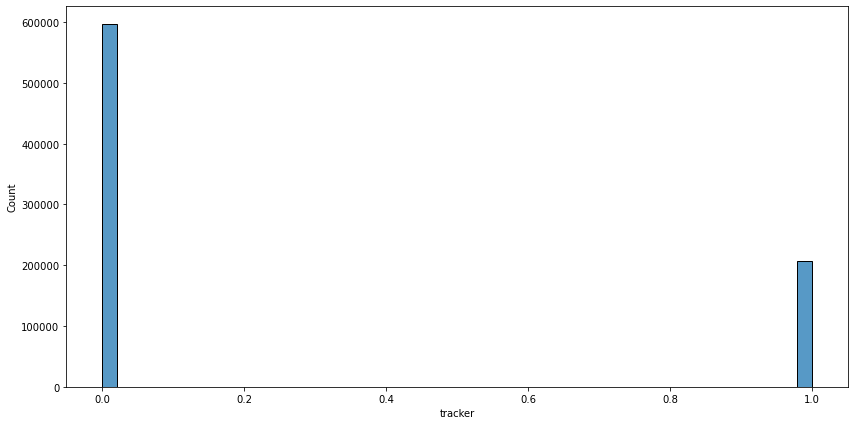

In [7]:
plt.figure(figsize=(14, 7))
sns.histplot(new_chrome_data, x="tracker")

In [13]:
old_chrome_data[['pragma', 'content-length', 'content-type', 'date']]

,pragma,content-length,content-type,date
0,no-cache,2183,application/x-javascript,"fri, 12 aug 2022 09:23:48 gmt"
1,None,None,application/javascript,"thu, 11 aug 2022 21:14:37 gmt"
2,None,None,text/javascript,"fri, 12 aug 2022 09:23:48 gmt"
3,None,18,application/json; charset=utf-8,"fri, 12 aug 2022 09:23:48 gmt"
4,None,None,text/javascript,"fri, 12 aug 2022 09:23:49 gmt"
...,...,...,...,...
168033,None,586,text/css,"fri, 12 aug 2022 11:37:38 gmt"
168034,None,418,text/css,"fri, 12 aug 2022 11:37:38 gmt"
168035,None,461,text/css,"fri, 12 aug 2022 11:37:38 gmt"
168036,None,21778,application/javascript,"fri, 12 aug 2022 11:37:38 gmt"


In [2]:
def read_json_file(
    name: str, target_file_name: str, target_data_dir, compression_alg
) -> pd.DataFrame:
    path = f"../../data/{target_data_dir}/{target_file_name}/{name}.json.{compression_alg}"
    print(path)
    print (f"\nDEBUG: File exists? {os.path.isfile(path)}\n")

    return pd.read_json(
        path,
        orient='records',
        compression='gzip'
    )


def prepare_initial_dataset(
    file_name: str, target_file: str, target_data_dir, compression_alg
) -> pd.DataFrame:
    data = (
        read_json_file(file_name, target_file, target_data_dir, compression_alg)
        .dropna()
        .reset_index(drop=True)
    )
    return data.loc[data["responseHeaders"].map(len) != 0].reset_index(drop=True)

In [3]:
response_data = prepare_initial_dataset('merged_data', 'chrome/03_29_2023', 'merged', 'gz')

../../data/merged/chrome/03_29_2023/merged_data.json.gz

DEBUG: File exists? True



In [3]:
response_data = prepare_initial_dataset('http.0', 'chrome/08_12_2022', 'raw', 'gzip')

../../data/raw/chrome/08_12_2022/http.0.json.gzip

DEBUG: File exists? True



In [4]:
def process_header_rows_2_np(row: list) -> dict:
    """
    Process a list of header rows and return a dictionary with lowercase keys
    and values.

    Parameters
    ----------
    row : list
        A list of header rows, where each row is a list containing a key and a
        value as strings.

    Returns
    -------
    dict
        A dictionary containing the header keys and values, where keys and
        values are lowercase.
    """
    http_message = np.array(row)
    header_keys = np.char.lower(http_message[:, 0])
    header_values = np.char.lower(http_message[:, 1])
    parsed_row_as_dict = dict(zip(header_keys, header_values))
    return parsed_row_as_dict

In [5]:
%%time
parsed_headers = [
        process_header_rows_2_np(i)
        for i in response_data["responseHeaders"]
    ]

CPU times: user 42.2 s, sys: 1.22 s, total: 43.5 s
Wall time: 43.7 s


In [6]:
%%time
column_names = list(set().union(*[set(d.keys()) for d in parsed_headers]))

CPU times: user 1.79 s, sys: 406 ms, total: 2.19 s
Wall time: 2.38 s


In [17]:
def rename_duplicate_keys(
    data: List[Dict[str, str]], key_mapping: Dict[str, str]
) -> List[Dict[str, str]]:
    return [
        {key_mapping.get(k, k): v for k, v in d.items()} for d in data
    ]

In [16]:
def find_duplicates(strings: List[str]) -> List[str]:
    """
    Find duplicate strings in a list and return a list of the duplicated strings.

    Parameters
    ----------
    strings : List[str]
        A list of strings to find duplicates in.

    Returns
    -------
    List[str]
        A list containing the duplicated strings found in the input list.

    Examples
    --------
    >>> strings = ["apple", "orange", "banana", "apple", "orange"]
    >>> find_duplicates(strings)
    ['apple', 'orange']
    """
    duplicates = []
    unique_strings = set()

    for string in strings:
        if string in unique_strings:
            duplicates.append(string)
        else:
            unique_strings.add(string)

    return duplicates

In [18]:
def concatenate_dicts_2(
        data: List[Dict[str, str]], column_names: List[str]
) -> np.ndarray:
    """
    Concatenate a list of dictionaries containing header data into a single NumPy array.

    Parameters
    ----------
    data : List[Dict[str, str]]
        A list of dictionaries, where each dictionary contains header keys and values.
    column_names : List[str]
        A list of header column names.

    Returns
    -------
    np.ndarray
        A NumPy array containing the concatenated header data.
    """
    data_array = np.empty((len(data), len(column_names)), dtype=object)
    col_to_idx = {col: idx for idx, col in enumerate(column_names)}

    for i, d in enumerate(data):
        for col, value in d.items():
            data_array[i, col_to_idx[col]] = value

    data_array[data_array is None] = np.nan
    return data_array

In [11]:
# def remove_value_at_index(
#         arr: np.ndarray, header_name: str, column_names: List[str]
# ) -> np.ndarray:
#     index = column_names.index(header_name)
#     result_array = np.hstack((arr[:, :index], arr[:, index + 1:]))
#     return result_array
#
#
# column_names.index('hostname')

4308

In [13]:
# column_names.index('protocol')

6461

In [ ]:
# print(arr[arr[6461] is not None][6461])

In [51]:
# column_names.pop(6527)

'hostname'

In [50]:
%%time
# arr = remove_value_at_index(arr, 'hostname', column_names)

CPU times: user 40.2 s, sys: 57.3 s, total: 1min 37s
Wall time: 3min 4s


In [31]:
%%time
def process_url_rows_v2(row: List[Dict]) -> np.ndarray:
    return pd.DataFrame.from_records(row).to_numpy()


url_rows = process_url_rows_v2(response_data["url"])

CPU times: user 1.11 s, sys: 362 ms, total: 1.47 s
Wall time: 1.63 s


In [55]:
%%time
# url_rows = remove_value_at_index(url_rows, 'protocol', [*response_data['url'][0]])

CPU times: user 430 ms, sys: 3.28 s, total: 3.71 s
Wall time: 10.8 s


In [13]:
url_rows_column_names = [*response_data['url'][0]]

In [19]:
duplicates = find_duplicates([*url_rows_column_names, *column_names, 'tracker'])

In [20]:
duplicates

['hostname', 'protocol']

In [21]:
def create_key_mapping(duplicate_keys: List[str]) -> Dict[str, str]:
    """
    Create a key mapping dictionary for renaming duplicate keys.

    Parameters
    ----------
    duplicate_keys : List[str]
        A list of duplicate keys to be renamed.

    Returns
    -------
    Dict[str, str]
        A dictionary mapping the original keys to their new names, which include '_dlc' suffix.

    Examples
    --------
    >>> duplicate_keys = ["a", "b"]
    >>> create_key_mapping(duplicate_keys)
    {"a": "a_dlc", "b": "b_dlc"}
    """
    return {key: f"{key}_dlc" for key in duplicate_keys}

In [22]:
key_mapper = create_key_mapping(duplicates)

In [23]:
key_mapper

{'hostname': 'hostname_dlc', 'protocol': 'protocol_dlc'}

In [15]:
def rename_duplicates(
        original_arr: List[str], duplicates_arr: List[str]
) -> List[str]:
    """
    Rename the duplicated elements in the original array of strings based on the
    given duplicates array. The duplicated strings in the original array will be
    renamed by appending '_dlc' to their original names.

    Parameters
    ----------
    original_arr : List[str]
        The original array of strings containing the elements to be checked for
        duplicates and potentially renamed.
    duplicates_arr : List[str]
        The array of strings containing the duplicated elements that should be
        renamed in the original array.

    Returns
    -------
    List[str]
        The updated array of strings with the duplicated elements renamed.

    Examples
    --------
    >>> original_arr = ['a', 'b', 'c', 'a', 'b']
    >>> duplicates_arr = ['a', 'b']
    >>> rename_duplicates(original_arr, duplicates_arr)
    ['a', 'b', 'c', 'a_dlc', 'b_dlc']
    """
    if not duplicates_arr:
        return original_arr

    renamed_arr = copy.deepcopy(original_arr)
    duplicates_set = copy.deepcopy(duplicates_arr)

    for i, header_name in enumerate(renamed_arr):
        if header_name in duplicates_set:
            print(f'Duplicate header name found at index {i} and renamed to '
                  f'{header_name}_dlc')
            renamed_arr[i] = f'{header_name}_dlc'
            duplicates_set.remove(header_name)

    return renamed_arr

In [24]:
column_names = rename_duplicates(column_names, duplicates)

Duplicate header name found at index 659 and renamed to hostname_dlc
Duplicate header name found at index 1511 and renamed to protocol_dlc


In [25]:
parsed_headers = rename_duplicate_keys(parsed_headers, key_mapper)

In [104]:
column_names[7239]

'hostname_dlc'

In [ ]:
# hostname_index = column_names.index("hostname")
# final_response_headers = remove_value_at_index(
#     final_response_headers, "hostname", column_names
# )
# column_names.pop(hostname_index)

In [26]:
%%time
arr = concatenate_dicts_2(parsed_headers, column_names)

CPU times: user 10.1 s, sys: 22.6 s, total: 32.7 s
Wall time: 42.1 s


In [27]:
def process_label_rows_v2(
    data: List[List[Dict[str, Union[bool, str, List]]]]
) -> np.ndarray:
    """
    Process a list of label row data and return a NumPy array.

    Args:
        data (List[List[Dict[str, Union[bool, str, List]]]]): A list containing
        label row data.

    Returns:
        np.ndarray: A NumPy array with processed label data.
    """
    columns = [r["blocklist"].lower() for row in data for r in row]
    unique_columns = list(set(columns))

    row_data = np.zeros((len(data), len(unique_columns)), dtype=bool)

    col_to_idx = {col: idx for idx, col in enumerate(unique_columns)}

    for i, row in enumerate(data):
        for r in row:
            col = r["blocklist"].lower()
            row_data[i, col_to_idx[col]] = r["isLabeled"]

    return row_data

In [28]:
%%time
labels = process_label_rows_v2(response_data["labels"])

CPU times: user 1.54 s, sys: 1.97 s, total: 3.52 s
Wall time: 4.71 s


In [29]:
def merge_boolean_columns(data: np.ndarray) -> np.ndarray:
    """
    Merge boolean columns by summing their values along the row axis.

    Args:
        data (np.ndarray): A NumPy array containing boolean values.

    Returns:
        np.ndarray: A NumPy array with merged boolean values.
    """
    merged = np.any(data, axis=1).astype(int)
    return merged

In [30]:
labels_parsed = merge_boolean_columns(labels)

In [45]:
def concat_arrays(
    header_array: np.ndarray,
    url_array: np.ndarray,
    label_array: np.ndarray,
) -> np.ndarray:
    """
    Concatenate header_array, url_array, and label_array column-wise.

    Parameters
    ----------
    header_array : np.ndarray
        2D NumPy array containing header information.
    url_array : np.ndarray
        2D NumPy array containing URL information.
    label_array : np.ndarray
        1D NumPy array containing label information.

    Returns
    -------
    np.ndarray
        A 2D NumPy array that is the concatenation of the input arrays.
    """
    print(f"header_array shape: {header_array.shape}")
    print(f"url_array shape: {url_array.shape}")
    print(f"label_array shape: {label_array.shape}")

    final_array = np.hstack((url_array, header_array))
    final_array = np.column_stack((final_array, label_array))

    return final_array

In [ ]:
%%time
# test = concat_arrays(arr, url_rows, labels_parsed)

In [37]:
holdout = column_names

In [34]:
url_rows_column_names

['hostname', 'pathname', 'filetype', 'filename', 'protocol', 'query']

In [67]:
url_column_names = url_rows_column_names

In [33]:
label_column_name = ['tracker']

n

In [38]:
find_duplicates([*url_rows_column_names, *holdout, *label_column_name])

[]

In [36]:
len([*url_rows_column_names, *column_names, *label_column_name])

7903

In [40]:
column_names = [*url_rows_column_names, *holdout, *label_column_name]

In [41]:
len(column_names)

7903

In [215]:
part_a_header = arr[0:100000,:]
part_a_url = url_rows[0:100000,:]
part_a_label = labels_parsed[0:100000]

In [44]:
def parse_chunks(
        header_array: np.ndarray,
        url_array: np.ndarray,
        label_array: np.ndarray,
        chunk_size: int
) -> np.ndarray:
    num_rows = header_array.shape[0]
    num_chunks = math.ceil(num_rows / chunk_size)
    result_chunks = []

    print(f"num_rows: {num_rows}, num_chunks: {num_chunks}")

    for i in range(num_chunks):
        print(f'iteration: {i}')
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, num_rows)

        print(f"start_idx: {start_idx}, end_idx: {end_idx}")

        part_header = header_array[start_idx:end_idx, :]
        part_url = url_array[start_idx:end_idx, :]
        part_label = label_array[start_idx:end_idx]

        combined = concat_arrays(part_header, part_url, part_label)
        result_chunks.append(combined.T)

    return result_chunks

In [52]:
%%time
a = parse_chunks(arr, url_rows, labels_parsed, 25000)

num_rows: 802813, num_chunks: 33
iteration: 0
start_idx: 0, end_idx: 25000
header_array shape: (25000, 7896)
url_array shape: (25000, 6)
label_array shape: (25000,)
iteration: 1
start_idx: 25000, end_idx: 50000
header_array shape: (25000, 7896)
url_array shape: (25000, 6)
label_array shape: (25000,)
iteration: 2
start_idx: 50000, end_idx: 75000
header_array shape: (25000, 7896)
url_array shape: (25000, 6)
label_array shape: (25000,)
iteration: 3
start_idx: 75000, end_idx: 100000
header_array shape: (25000, 7896)
url_array shape: (25000, 6)
label_array shape: (25000,)
iteration: 4
start_idx: 100000, end_idx: 125000
header_array shape: (25000, 7896)
url_array shape: (25000, 6)
label_array shape: (25000,)
iteration: 5
start_idx: 125000, end_idx: 150000
header_array shape: (25000, 7896)
url_array shape: (25000, 6)
label_array shape: (25000,)
iteration: 6
start_idx: 150000, end_idx: 175000
header_array shape: (25000, 7896)
url_array shape: (25000, 6)
label_array shape: (25000,)
iteration: 7

In [53]:
%%time
b = [pa.Table.from_arrays(elem, names=column_names) for elem in a]

CPU times: user 2min 53s, sys: 43.6 s, total: 3min 37s
Wall time: 4min 45s


In [ ]:
%%time
final_result = pa.concat_tables(b, promote=True)

In [49]:
%%time
pq.write_table(final_result, "ndarray_chrome_test.parquet")
print('done')

done
CPU times: user 36.1 s, sys: 7.68 s, total: 43.8 s
Wall time: 51.4 s


In [77]:
%%time
# test_part_a = concat_arrays(part_a_header, part_a_url, part_a_label)

header_array shape: (100000, 7895)
url_array shape: (100000, 5)
label_array shape: (100000,)
CPU times: user 8.64 s, sys: 10.7 s, total: 19.3 s
Wall time: 24.4 s


In [41]:
%%time
# part_a = pd.DataFrame(test_part_a, columns=column_names)

CPU times: user 2min 49s, sys: 4.69 s, total: 2min 54s
Wall time: 2min 55s


In [43]:
# part_b = part_a.copy(deep=True)

In [48]:
# part_c = part_a.copy(deep=True)
# part_d = part_a.copy(deep=True)
# part_e = part_a.copy(deep=True)
# part_f = part_a.copy(deep=True)

In [49]:
# %%time
# combined = pd.concat([part_a, part_b, part_c, part_d, part_e, part_f], axis=0, ignore_index=True)

CPU times: user 27.7 s, sys: 27.2 s, total: 54.9 s
Wall time: 1min 18s


In [60]:
%%time
arr_t = test_part_a.T

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 11 µs


In [61]:
%%time
arr_t_l = arr_t.tolist()

CPU times: user 1min 25s, sys: 10.2 s, total: 1min 35s
Wall time: 1min 44s


In [62]:
%%time
table_test = pa.table(arr_t_l, names=column_names)
print('done')

done
CPU times: user 12.5 s, sys: 6.46 s, total: 18.9 s
Wall time: 24.4 s


In [66]:
%%time
arr_table = pa.Table.from_arrays(arr_t, names=column_names)

CPU times: user 1min 16s, sys: 5.44 s, total: 1min 21s
Wall time: 1min 24s


In [72]:
%%time
concat_table = pa.concat_tables([table_test, arr_table])

CPU times: user 3.44 ms, sys: 1.2 ms, total: 4.64 ms
Wall time: 3.12 ms


In [73]:
%%time
pq.write_table(concat_table, "ndarray_test.parquet")
print('done')

done
CPU times: user 7 s, sys: 738 ms, total: 7.74 s
Wall time: 8.36 s


In [82]:
cols = concat_table.column_names

In [20]:
column_names.index('hostname')

2520

In [20]:
column_names.pop(2352)

'hostname'

In [52]:
column_names[601:604]

['x-amz-id-1', 'x-gd-trace-id', 's-rt']

In [22]:
def remove_value_at_index(
        arr: np.ndarray, header_name: str, column_names: List[str]
) -> np.ndarray:
    index = column_names.index(header_name)
    result_array = np.hstack((arr[:, :index], arr[:, index+1:]))
    return result_array

In [28]:
%%time
arr = remove_value_at_index(arr, 'hostname', column_names)

CPU times: user 2.18 s, sys: 2.06 s, total: 4.23 s
Wall time: 4.69 s


In [ ]:
# %%time
# print(np.concatenate((url_rows, arr), axis=1))

# END OF PARSE RAW DATA TESTS

In [51]:
def test_new_categories_update(
    element: str, dataset: pd.DataFrame
) -> Optional[Dict[str, str]]:
    """
    Test if the given column of the dataset can be converted to the Int64 data type. If so, return a dictionary
    with the column name as the key and 'Int64' as the value. Otherwise, return None.

    Parameters
    ----------
    element : str
        The column name to be tested.
    dataset : pd.DataFrame
        The DataFrame containing the column.

    Returns
    -------
    Optional[Dict[str, str]]
        A dictionary with the column name and 'Int64' if the column can be converted to the Int64 data type,
        None otherwise.
    """
    categories = dataset[element].astype("category").cat.categories.values.tolist()
    try:
        np.array(categories, dtype="int64")
        return {element: "Int64"}
    except (ValueError, OverflowError):
        return None


def create_categories_list(dataset: pd.DataFrame) -> Dict[str, Union[str, None]]:
    """
    Create a dictionary of column names and their corresponding data types for the given dataset. The data types
    are determined based on the column values. If a column can be converted to Int64, its data type is set to
    'Int64', otherwise it is set to 'category'.

    Parameters
    ----------
    dataset : pd.DataFrame
        The input DataFrame for which to create the dictionary of column names and data types.

    Returns
    -------
    Dict[str, Union[str, None]]
        A dictionary of column names and their corresponding data types.
    """
    dtype_list = {i: "category" for i in dataset.columns.values[:-1]}
    current_columns = dataset.columns.values[:-1].tolist()
    int64_columns = [
        test_new_categories_update(element, dataset) for element in current_columns
    ]

    int64_columns = list(filter(lambda x: type(x) is dict, int64_columns))
    int64_columns = {k: v for d in int64_columns for k, v in d.items()}

    dtype_list.update(int64_columns)
    return dtype_list

In [12]:
def generate_large_dataframe(
    num_rows: int,
    num_columns: int,
    num_int_columns: int,
    max_cardinality: int,
    max_length: int,
) -> pd.DataFrame:
    """
    Generate a large DataFrame with a given number of rows, columns, integer columns, and varying
    cardinalities for categorical columns.

    Parameters
    ----------
    num_rows : int
        The number of rows in the DataFrame.
    num_columns : int
        The number of columns in the DataFrame.
    num_int_columns : int
        The number of integer columns in the DataFrame.
    max_cardinality : int
        The maximum cardinality for categorical columns.
    max_length : int
        The maximum length for categorical values.

    Returns
    -------
    pd.DataFrame
        A generated DataFrame with the specified number of rows, columns, and varying cardinalities.
    """

    def generate_categorical_values(cardinality: int, max_length: int) -> List[str]:
        return [
            "".join(
                random.choices(string.ascii_letters, k=random.randint(1, max_length))
            )
            for _ in range(cardinality)
        ]

    categorical_columns = num_columns - num_int_columns
    categorical_data = {
        f"col_{i}": np.random.choice(
            generate_categorical_values(random.randint(1, max_cardinality), max_length),
            size=num_rows,
        )
        for i in range(1, categorical_columns + 1)
    }
    int_data = {
        f"int_col_{i}": np.random.randint(0, 100, size=num_rows)
        for i in range(1, num_int_columns + 1)
    }

    data = {
        "query": np.random.choice(list("1234"), size=num_rows),
        "protocol": np.random.choice(list("5678"), size=num_rows),
    }

    data.update(categorical_data)
    data.update(int_data)

    return pd.DataFrame(data)

In [19]:
data = pd.read_parquet(
    "../../data/processed/chrome/08_12_2022/train_set_01.parquet.gzip",
    engine="pyarrow",
    dtype_backend="pyarrow",
)

In [11]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 272004 entries, 256683 to 157680
Columns: 5316 entries, hostname to tracker
dtypes: int32[pyarrow](1), list<item: list<item: string>>[pyarrow](1), null[pyarrow](200), string[pyarrow](5114)
memory usage: 5.5 GB


In [25]:
empty_columns = [col for col in data if data[col].isnull().all() == True]

In [26]:
data.drop(empty_columns, axis=1, inplace=True)

In [27]:
data_column_values = data.columns.values[6:-1].tolist()

In [28]:
def new_fuzzy_string_matching_for_column(
    col_name: str, col_values: List[str]
) -> pd.DataFrame:
    """
    Find fuzzy matches for a given column name with a list of column values.

    Parameters
    ----------
    col_name : str
        The column name for which fuzzy matches should be found.
    col_values : List[str]
        A list of column values to compare with the given column name.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing the fuzzy matches, their respective scores,
        and the original column name.
    """
    fuzzy_result = pd.DataFrame(
        process.extract(
            col_name, col_values, processor=None, score_cutoff=80, limit=100
        ),
        columns=["fuzzy_match", "w_ratio", "index"],
    )
    fuzzy_result["col_name"] = col_name
    return fuzzy_result


def find_cols_with_similar_values(
    fuzzy_match: str, column: str, dataset: pd.DataFrame
) -> Optional[Tuple[str, str]]:
    """
    Compare two columns and return their names if more than 50% of their values are similar.

    Parameters
    ----------
    fuzzy_match : str
        The name of the first column.
    column : str
        The name of the second column.

    Returns
    -------
    Optional[Tuple[str, str]]
        A tuple containing the column names if more than 50% of their values are similar, otherwise None.
    """
    value_fuzzy = set(dataset[fuzzy_match].dropna().values)
    value_column = set(dataset[column].dropna().values)

    common_values = len(value_fuzzy.intersection(value_column))
    len_value_fuzzy = len(value_fuzzy)

    if common_values / len_value_fuzzy > 0.5:
        return fuzzy_match, column
    else:
        return None


def select_similar_columns(
    fuzzy_match: str, column: str, match_df: pd.DataFrame
) -> pd.DataFrame:
    """
    Select a row from the `match_df` DataFrame based on the provided column names and remove it from the DataFrame.

    Parameters
    ----------
    fuzzy_match : str
        The name of the first column.
    column : str
        The name of the second column.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing the selected row.
    """
    row = match_df.loc[
        (match_df["fuzzy_match"] == fuzzy_match) & (match_df["col_name"] == column)
    ]
    match_df.drop(row.index[0], inplace=True)
    return row


def merge_similar_columns(fuzzy_match: str, col_name: str, df: pd.DataFrame) -> None:
    """
    Merge the values of two columns in the given DataFrame by replacing null values in the second column
    with the corresponding values from the first column.

    Parameters
    ----------
    fuzzy_match : str
        The name of the first column.
    col_name : str
        The name of the second column.
    df : pd.DataFrame
        The DataFrame to process.

    Returns
    -------
    None
    """
    boolean_mask = df[fuzzy_match].notnull()
    new_values = df.loc[boolean_mask, fuzzy_match].to_numpy()
    indices_fuzzy_matches = boolean_mask[boolean_mask].index.tolist()

    current_values = df[col_name].to_numpy()
    np.put(current_values, indices_fuzzy_matches, new_values)
    df[col_name] = current_values

In [29]:
%%time
match = [
    new_fuzzy_string_matching_for_column(j, data_column_values[i + 1 :])
    for i, j in enumerate(data_column_values)
    if i != len(data_column_values) - 1
]

CPU times: user 19.9 s, sys: 164 ms, total: 20 s
Wall time: 20.1 s


In [30]:
match2 = pd.concat(match, ignore_index=True)

In [31]:
match2

,fuzzy_match,w_ratio,index,col_name
0,pragrma,92.307692,3532,pragma
1,x-akamai-pragma-client-ip,90.000000,390,pragma
2,pragma-directive,90.000000,2534,pragma
3,pramga,83.333333,1041,pragma
4,x-content-type,92.307692,722,content-type
...,...,...,...,...
25933,x-width,90.000000,8,wid
25934,nrk-application-version,90.000000,0,nrk-application
25935,xc-version,80.000000,12,nrk-application-version
25936,x-adstyle,82.352941,2,x-adtype


In [32]:
%%time
result = [
    find_cols_with_similar_values(col, col2, data)
    for col, col2 in zip(match2["fuzzy_match"], match2["col_name"])
]

CPU times: user 1min 50s, sys: 945 ms, total: 1min 51s
Wall time: 1min 51s


In [26]:
result

[('pragrma', 'pragma'),
 None,
 ('pragma-directive', 'pragma'),
 ('pramga', 'pragma'),
 None,
 ('content_type', 'content-type'),
 ('contetn-type', 'content-type'),
 None,
 None,
 None,
 ('x-tb-optimization-original-content-type', 'content-type'),
 None,
 ('x-hs-alternate-content-type', 'content-type'),
 ('x-upyun-content-type', 'content-type'),
 ('x-amz-meta-content-type', 'content-type'),
 ('x-tb-oa-originalcontenttype', 'content-type'),
 None,
 ('content-style-type', 'content-type'),
 None,
 ('x-nyt-data-last-modified', 'last-modified'),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ('x-accept-ranges', 'accept-ranges'),
 None,
 ('x-amz-meta-accept-ranges', 'accept-ranges'),
 None,
 None,
 None,
 None,
 None,
 None,
 ('x-xss-protections', 'x-xss-protection'),
 None,
 None,
 ('x-content-type-option', 'x-content-type-options'),
 None,
 None,
 None,
 ('x-content-options', 'x-content-type-options'),
 ('x-control-type-options', 'x-content-type-options'),
 None,
 No

In [33]:
data.reset_index(drop=True, inplace=True)

In [34]:
similar_values = [
    select_similar_columns(col[0], col[1], match2) for col in result if col is not None
]

In [35]:
similar_values

[  fuzzy_match    w_ratio index col_name
 0     pragrma  92.307692  3532   pragma,
         fuzzy_match  w_ratio index col_name
 2  pragma-directive     90.0  2534   pragma,
   fuzzy_match    w_ratio index col_name
 3      pramga  83.333333  1041   pragma,
     fuzzy_match    w_ratio index      col_name
 5  content_type  91.666667  1449  content-type,
     fuzzy_match    w_ratio index      col_name
 6  contetn-type  91.666667  4032  content-type,
                                 fuzzy_match  w_ratio index      col_name
 10  x-tb-optimization-original-content-type     90.0  1513  content-type,
                     fuzzy_match  w_ratio index      col_name
 12  x-hs-alternate-content-type     90.0  1753  content-type,
              fuzzy_match  w_ratio index      col_name
 13  x-upyun-content-type     90.0  2151  content-type,
                 fuzzy_match  w_ratio index      col_name
 14  x-amz-meta-content-type     90.0  4339  content-type,
                     fuzzy_match    w_ratio ind

In [36]:
similar_values = pd.concat(similar_values, ignore_index=True)

In [37]:
similar_values

,fuzzy_match,w_ratio,index,col_name
0,pragrma,92.307692,3532,pragma
1,pragma-directive,90.000000,2534,pragma
2,pramga,83.333333,1041,pragma
3,content_type,91.666667,1449,content-type
4,contetn-type,91.666667,4032,content-type
...,...,...,...,...
1634,x-cache-nx,80.000000,3,x-cache-vf
1635,x-cache-cms-status,80.000000,151,x-cache-vf
1636,x-cache-nx,80.000000,0,x-cache-ve
1637,x-cache-cms-status,80.000000,148,x-cache-ve


In [38]:
data[data["pragrma"].notna()][["pragma", "pragrma"]]

,pragma,pragrma
267313,<NA>,no-cache


In [39]:
similar_values.apply(
    lambda x: merge_similar_columns(x["fuzzy_match"], x["col_name"], data), axis=1
)

0       None
1       None
2       None
3       None
4       None
        ... 
1634    None
1635    None
1636    None
1637    None
1638    None
Length: 1639, dtype: object

In [40]:
data[data["pragrma"].notna()][["pragma", "pragrma"]]

,pragma,pragrma
267313,no-cache,no-cache


In [41]:
columns_to_remove = list(set(similar_values.fuzzy_match.values.tolist()))
data.drop(columns_to_remove, axis=1, inplace=True)

In [42]:
data[data["pragrma"].notna()][["pragma", "pragrma"]]

KeyError: 'pragrma'

In [43]:
data

,hostname,pathname,filetype,filename,protocol,query,pragma,content-type,last-modified,accept-ranges,...,x-publisherdesk-origin,xc-version,x-amzn-waf-action,generated,x-amz-req-time-micros,debug_plat_b,x-ta,x-pbs-appsvrname,x-pbs-appsvrip,tracker
0,tpc.googlesyndication.com,/pagead/js/r20220810/r20110914/client/one_clic...,js,one_click_handler_one_afma_fy2021.js,https:,[],<NA>,text/javascript; charset=utf-8,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
1,res.cdn.office.net,/officehub/bundles/staying-aware.b8b088b355c55...,js,staying-aware.b8b088b355c55b4ea7d6.chunk.v6.js,https:,[],<NA>,application/javascript,"mon, 08 aug 2022 21:56:59 gmt",NaN,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
2,www.google.com,/ads/ga-audiences,/ads/ga-audiences,ga-audiences,https:,"[array(['t', 'sr'], dtype=object) array(['aip'...",no-cache,image/gif,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
3,ipv4-c113-lhr004-ix.1.oca.nflxvideo.net,/speedtest/range/0-0,/speedtest/range/0-0,0-0,https:,"[array(['c', 'de'], dtype=object) array(['n', ...",no-cache,<NA>,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4,shimo.im,/,/,,https:,[],<NA>,text/html; charset=utf-8,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271999,www.criteo.com,/wp-content/uploads/2021/01/ss-logo-Lamps-Plus...,png,ss-logo-Lamps-Plus.png,https:,[],<NA>,image/png,"fri, 12 nov 2021 05:09:38 gmt",bytes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
272000,ads.adfox.ru,/260122/event,/260122/event,event,https:,"[array(['pm', 'cyz'], dtype=object) array(['h...",no-cache,<NA>,"fri, 12 aug 2022 09:22:13 gmt",<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
272001,synostatic.synology.com,/font/inter/inter-w400-6.woff2,woff2,inter-w400-6.woff2,https:,[],<NA>,binary/octet-stream,"mon, 20 dec 2021 02:24:19 gmt",bytes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
272002,tenor.com,/opensearch.xml,xml,opensearch.xml,https:,[],<NA>,application/xml,"thu, 26 apr 2018 18:25:27 gmt",bytes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [44]:
data.dtypes

hostname            string[pyarrow]
pathname            string[pyarrow]
filetype            string[pyarrow]
filename            string[pyarrow]
protocol            string[pyarrow]
                         ...       
debug_plat_b        string[pyarrow]
x-ta                string[pyarrow]
x-pbs-appsvrname    string[pyarrow]
x-pbs-appsvrip      string[pyarrow]
tracker              int32[pyarrow]
Length: 4454, dtype: object

In [46]:
data = data.iloc[:, 6:]

In [47]:
data

,pragma,content-type,last-modified,accept-ranges,etag,p3p,x-xss-protection,x-content-type-options,strict-transport-security,x-robots-tag,...,x-publisherdesk-origin,xc-version,x-amzn-waf-action,generated,x-amz-req-time-micros,debug_plat_b,x-ta,x-pbs-appsvrname,x-pbs-appsvrip,tracker
0,<NA>,text/javascript; charset=utf-8,<NA>,NaN,15601544113783900868,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
1,<NA>,application/javascript,"mon, 08 aug 2022 21:56:59 gmt",NaN,<NA>,<NA>,<NA>,nosniff,max-age=31536000; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
2,no-cache,image/gif,<NA>,NaN,<NA>,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
3,no-cache,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4,<NA>,text/html; charset=utf-8,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,max-age=15724800; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271999,<NA>,image/png,"fri, 12 nov 2021 05:09:38 gmt",bytes,"""618df712-2509""",<NA>,<NA>,<NA>,max-age=300,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
272000,no-cache,<NA>,"fri, 12 aug 2022 09:22:13 gmt",<NA>,<NA>,<NA>,<NA>,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
272001,<NA>,binary/octet-stream,"mon, 20 dec 2021 02:24:19 gmt",bytes,"""4abfa4888190370d347034f9fa43c804""",<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
272002,<NA>,application/xml,"thu, 26 apr 2018 18:25:27 gmt",bytes,"w/""29a-1630333f5d8""",<NA>,1; mode=block,nosniff,max-age=31536000; preload,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [54]:
%%time
list_of_dtypes = create_categories_list(data)

CPU times: user 17 s, sys: 79.2 ms, total: 17.1 s
Wall time: 17.1 s
CPU times: user 17.3 s, sys: 122 ms, total: 17.4 s
Wall time: 17.6 s


In [55]:
list_of_dtypes

{'pragma': 'category',
 'content-type': 'category',
 'last-modified': 'category',
 'accept-ranges': 'category',
 'etag': 'category',
 'p3p': 'category',
 'x-xss-protection': 'category',
 'x-content-type-options': 'category',
 'strict-transport-security': 'category',
 'x-robots-tag': 'category',
 'vary': 'category',
 'content-encoding': 'category',
 'cache-control': 'category',
 'expires': 'category',
 'date': 'category',
 'content-length': 'Int64',
 'connection': 'category',
 'x-amz-server-side-encryption': 'category',
 'x-amz-version-id': 'category',
 'server': 'category',
 'x-cache': 'category',
 'via': 'category',
 'x-amz-cf-pop': 'category',
 'x-amz-cf-id': 'category',
 'age': 'category',
 'x-guploader-uploadid': 'category',
 'x-goog-generation': 'Int64',
 'x-goog-hash': 'category',
 'x-goog-storage-class': 'category',
 'cf-cache-status': 'category',
 'expect-ct': 'category',
 'report-to': 'category',
 'nel': 'category',
 'cf-ray': 'category',
 'alt-svc': 'category',
 'access-contr

In [56]:
data = data.astype(list_of_dtypes)

In [57]:
data.dtypes

pragma                    category
content-type              category
last-modified             category
accept-ranges             category
etag                      category
                         ...      
debug_plat_b              category
x-ta                      category
x-pbs-appsvrname          category
x-pbs-appsvrip            category
tracker             int32[pyarrow]
Length: 4448, dtype: object

In [58]:
def reduced_variance_per_column(column: str, dataset: pd.DataFrame) -> List[Union[str, int, float]]:
    """
    Calculate the number of unique values and the ratio of missing values for a given column in a DataFrame.

    Parameters
    ----------
    column : str
        The name of the column for which to compute the unique values and NA ratio.
    dataset : pd.DataFrame
        The DataFrame containing the specified column.

    Returns
    -------
    List[Union[str, int, float]]
        A list containing the column name, number of unique values (excluding NaN), and NA ratio.
    """
    unique_values = dataset[column].nunique(dropna=True)
    na_ratio = dataset[column].isna().mean()
    return [column, unique_values, round(na_ratio, 3)]

In [77]:
def create_summary_table(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Create a summary table containing the number of unique values and the NA ratio for each column in a DataFrame.

    Parameters
    ----------
    dataset : pd.DataFrame
        The DataFrame for which to compute the summary table.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing the number of unique values and the NA ratio for each column in the input DataFrame.
    """
    table_result = dataset.apply(
        lambda x: pd.Series(
            {
                "header_name": x.name,
                "unique_values": x.nunique(dropna=True),
                "na_ratio": round(x.isna().mean(), 3)
            }
        )
    ).T

    table_result["unique_values"] = table_result["unique_values"].astype("Int32")
    table_result["na_ratio"] = table_result["na_ratio"].astype("float32")
    table_result.reset_index(drop=True, inplace=True)

    return table_result

In [78]:
summary_table = create_summary_table(data.iloc[:, :-1])

In [79]:
summary_table

,header_name,unique_values,na_ratio
0,pragma,13,0.873
1,content-type,324,0.037
2,last-modified,88351,0.330
3,accept-ranges,2,0.517
4,etag,113969,0.456
...,...,...,...
4442,x-amz-req-time-micros,3,1.000
4443,debug_plat_b,1,1.000
4444,x-ta,1,1.000
4445,x-pbs-appsvrname,1,1.000


In [80]:
remove_headers_with_one_na_ratio = summary_table[
    summary_table["na_ratio"] == 1
    ].header_name.values.tolist()
remove_headers_with_one_value = summary_table[
    (summary_table["unique_values"] <= 1) & (summary_table["na_ratio"] != 1)
    ].header_name.values.tolist()

In [83]:
data.drop(remove_headers_with_one_na_ratio, axis=1, inplace=True)
data.drop(remove_headers_with_one_value, axis=1, inplace=True)

In [84]:
data

,pragma,content-type,last-modified,accept-ranges,etag,p3p,x-xss-protection,x-content-type-options,strict-transport-security,x-robots-tag,...,z-stale-enabled,z-fastly-info-state,z-backend-name,z-react-reason,z-polopoly-beckend,z-url-original,z-url-modified,z-surrogate-keys,z-actions-log,tracker
0,NaN,text/javascript; charset=utf-8,NaN,NaN,15601544113783900868,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1
1,NaN,application/javascript,"mon, 08 aug 2022 21:56:59 gmt",NaN,<NA>,<NA>,NaN,nosniff,max-age=31536000; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0
2,no-cache,image/gif,NaN,NaN,<NA>,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1
3,no-cache,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0
4,NaN,text/html; charset=utf-8,NaN,NaN,<NA>,<NA>,NaN,NaN,max-age=15724800; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271999,NaN,image/png,"fri, 12 nov 2021 05:09:38 gmt",bytes,"""618df712-2509""",<NA>,NaN,NaN,max-age=300,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0
272000,no-cache,NaN,"fri, 12 aug 2022 09:22:13 gmt",NaN,<NA>,<NA>,NaN,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1
272001,NaN,binary/octet-stream,"mon, 20 dec 2021 02:24:19 gmt",bytes,"""4abfa4888190370d347034f9fa43c804""",<NA>,NaN,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0
272002,NaN,application/xml,"thu, 26 apr 2018 18:25:27 gmt",bytes,"w/""29a-1630333f5d8""",<NA>,1; mode=block,nosniff,max-age=31536000; preload,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0


In [85]:
del remove_headers_with_one_na_ratio
del summary_table

In [94]:
def count_trackers_and_non_trackers(column: pd.Series, tracker: pd.Series) -> List[Union[str, int]]:
    """
    Count the number of trackers and non-trackers in a given column of a DataFrame.

    Parameters
    ----------
    column : pd.Series
        The column to count trackers and non-trackers.
    tracker : pd.Series
        The 'tracker' column from the DataFrame.

    Returns
    -------
    List[Union[str, int]]
        A list containing the column name, the number of trackers, and the number of non-trackers.
    """
    column_name = column.name
    notnull_mask = column.notnull()
    tracker_ratio = tracker[notnull_mask].value_counts()
    try:
        trackers = tracker_ratio[1]
    except KeyError:
        trackers = 0
    try:
        non_trackers = tracker_ratio[0]
    except KeyError:
        non_trackers = 0
    return [column_name, trackers, non_trackers]


def create_summary_table_2(dataset: pd.DataFrame) -> pd.DataFrame:
    number_of_elements_reduced = np.array(
        [
            count_trackers_and_non_trackers(dataset[column], dataset["tracker"])
            for column in dataset.iloc[:, 4:-1].columns
        ]
    )
    summary_table_2 = pd.DataFrame(
        number_of_elements_reduced, columns=["header_name", "trackers", "non_trackers"]
    )
    summary_table_2["trackers"] = summary_table_2["trackers"].astype("Int32")
    summary_table_2["non_trackers"] = summary_table_2["non_trackers"].astype("float32")
    summary_table_2["ratio"] = (
        summary_table_2["trackers"] / summary_table_2["non_trackers"]
    ) * 100
    summary_table_2["ratio2"] = (
        summary_table_2["non_trackers"] / summary_table_2["trackers"]
    ) * 100
    return summary_table_2


In [97]:
%%time
summary_table_2 = create_summary_table_2(data)

CPU times: user 497 ms, sys: 203 ms, total: 700 ms
Wall time: 815 ms


In [111]:
def update_combined_columns(dataset: pd.DataFrame, col_list: List[str], classification: int, column_name: str) -> None:
    """
    Update the combined columns in the dataset based on given column list and classification.

    Parameters
    ----------
    dataset : pd.DataFrame
        The dataset to update.
    col_list : List[str]
        The list of columns to process.
    classification : int
        The classification value (0 or 1) to filter rows in the dataset.
    column_name : str
        The name of the column to update in the dataset.
    """
    indices = [
        dataset[(dataset[col].notnull()) & (dataset["tracker"] == classification)].index.tolist()
        for col in col_list
    ]
    indices_concat = list(np.concatenate(indices).flat)
    count_indices = dict(Counter(indices_concat))

    for key, value in count_indices.items():
        dataset.at[key, column_name] = value


def find_cols_to_combine(information_table: pd.DataFrame) -> Tuple[List[str], List[str]]:
    """
    Find columns to combine based on the given information table.

    Parameters
    ----------
    information_table : pd.DataFrame
        A summary table with column information.

    Returns
    -------
    Tuple[List[str], List[str]]
        A tuple containing two lists of column names: one for non-trackers and one for trackers.
    """
    only_non_trackers = information_table[
        information_table["ratio"] <= 10
    ].header_name.values.tolist()
    only_trackers = information_table[
        information_table["ratio2"] <= 10
    ].header_name.values.tolist()
    return only_non_trackers, only_trackers


def concise_information_wrapper(dataset: pd.DataFrame, table: pd.DataFrame) -> None:
    """
    Process dataset with concise information and update the dataset with combined columns.

    Parameters
    ----------
    dataset : pd.DataFrame
        The dataset to process and update.
    table : pd.DataFrame
        A summary table with column information.
    """

    only_non_tracker_cols, only_tracker_cols = find_cols_to_combine(table)

    dataset["comb_col_non_tracker"] = 0
    dataset["comb_col_tracker"] = 0

    update_combined_columns(dataset, only_tracker_cols, 1, "comb_col_tracker")
    update_combined_columns(dataset, only_non_tracker_cols, 0, "comb_col_non_tracker")

In [112]:
concise_information_wrapper(data, summary_table_2)

In [113]:
data

,pragma,content-type,last-modified,accept-ranges,etag,p3p,x-xss-protection,x-content-type-options,strict-transport-security,x-robots-tag,...,z-backend-name,z-react-reason,z-polopoly-beckend,z-url-original,z-url-modified,z-surrogate-keys,z-actions-log,tracker,comb_col_non_tracker,comb_col_tracker
0,NaN,text/javascript; charset=utf-8,NaN,NaN,15601544113783900868,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1,0,0
1,NaN,application/javascript,"mon, 08 aug 2022 21:56:59 gmt",NaN,<NA>,<NA>,NaN,nosniff,max-age=31536000; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0,2,0
2,no-cache,image/gif,NaN,NaN,<NA>,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1,0,0
3,no-cache,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0,1,0
4,NaN,text/html; charset=utf-8,NaN,NaN,<NA>,<NA>,NaN,NaN,max-age=15724800; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271999,NaN,image/png,"fri, 12 nov 2021 05:09:38 gmt",bytes,"""618df712-2509""",<NA>,NaN,NaN,max-age=300,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0,5,0
272000,no-cache,NaN,"fri, 12 aug 2022 09:22:13 gmt",NaN,<NA>,<NA>,NaN,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,1,0,0
272001,NaN,binary/octet-stream,"mon, 20 dec 2021 02:24:19 gmt",bytes,"""4abfa4888190370d347034f9fa43c804""",<NA>,NaN,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0,0,0
272002,NaN,application/xml,"thu, 26 apr 2018 18:25:27 gmt",bytes,"w/""29a-1630333f5d8""",<NA>,1; mode=block,nosniff,max-age=31536000; preload,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0,1,0


In [115]:
only_non_tracker_col, only_tracker_col = find_cols_to_combine(summary_table_2)

In [116]:
only_non_tracker_col

['akamai-true-ttl',
 'server-timing',
 'x-serial',
 'x-check-cacheable',
 'content-md5',
 'x-ms-request-id',
 'x-ms-version',
 'x-ms-blob-type',
 'cf-bgj',
 'cf-polished',
 'x-edgeconnect-cache-status',
 'x-cache-hits',
 'x-cache-status',
 'x-client-ip',
 'x-akamai-transformed',
 'link',
 'actual-object-ttl',
 'x-oracle-dms-rid',
 'x-oracle-dms-ecid',
 'x-amz-ir-id',
 'surrogate-key',
 'edge-cache-tag',
 'content-language',
 'x-ua-compatible',
 'x-upstream',
 'x-accel-expires',
 'x-77-nzt',
 'x-77-cache',
 'x-77-nzt-ray',
 'x-77-pop',
 'x_req_id',
 'service-worker-allowed',
 'traceparent',
 'x-cloud-trace-context',
 'x-pantheon-styx-hostname',
 'x-styx-req-id',
 'fastly-io-info',
 'fastly-stats',
 'x-fb-trip-id',
 'x-seen-by',
 'x-wix-request-id',
 'x-varnish',
 'x-jsd-version',
 'x-jsd-version-type',
 'x-proxy-cache',
 'host-header',
 'x-ac',
 'x-nc',
 'wn',
 'x-rq',
 'server-time',
 'x-dispatcher',
 'x-vhost',
 'x-goog-meta-goog-reserved-file-mtime',
 'cf-ipcountry',
 'x-amz-meta-sur

In [119]:
data.drop(only_non_tracker_col, axis=1, inplace=True)
data.drop(only_tracker_col, axis=1, inplace=True)

In [120]:
data

,pragma,content-type,last-modified,accept-ranges,etag,p3p,x-xss-protection,x-content-type-options,strict-transport-security,x-robots-tag,...,x-b3-sampled,x-b3-spanid,x-hubspot-correlation-id,x-hs-target-asset,x-hostname,x-cdn-pop,x-cdn-pop-ip,tracker,comb_col_non_tracker,comb_col_tracker
0,NaN,text/javascript; charset=utf-8,NaN,NaN,15601544113783900868,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,0
1,NaN,application/javascript,"mon, 08 aug 2022 21:56:59 gmt",NaN,<NA>,<NA>,NaN,nosniff,max-age=31536000; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,2,0
2,no-cache,image/gif,NaN,NaN,<NA>,"policyref=""https://www.googleadservices.com/pa...",0,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,0
3,no-cache,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,0
4,NaN,text/html; charset=utf-8,NaN,NaN,<NA>,<NA>,NaN,NaN,max-age=15724800; includesubdomains,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271999,NaN,image/png,"fri, 12 nov 2021 05:09:38 gmt",bytes,"""618df712-2509""",<NA>,NaN,NaN,max-age=300,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,5,0
272000,no-cache,NaN,"fri, 12 aug 2022 09:22:13 gmt",NaN,<NA>,<NA>,NaN,nosniff,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,0
272001,NaN,binary/octet-stream,"mon, 20 dec 2021 02:24:19 gmt",bytes,"""4abfa4888190370d347034f9fa43c804""",<NA>,NaN,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0
272002,NaN,application/xml,"thu, 26 apr 2018 18:25:27 gmt",bytes,"w/""29a-1630333f5d8""",<NA>,1; mode=block,nosniff,max-age=31536000; preload,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,0
